In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print('Done')
import os
os.listdir()

Done


['.ipynb_checkpoints', 'covid-variants.csv', 'Untitled.ipynb']

In [2]:
data = pd.read_csv('covid-variants.csv')
data.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [22]:
type(data)

pandas.core.frame.DataFrame

In [23]:
print(data['variant'].unique())
np.size(data['variant'].unique())

['Alpha' 'B.1.1.277' 'B.1.1.302' 'B.1.1.519' 'B.1.160' 'B.1.177' 'B.1.221'
 'B.1.258' 'B.1.367' 'B.1.620' 'Beta' 'Delta' 'Epsilon' 'Eta' 'Gamma'
 'Iota' 'Kappa' 'Lambda' 'Mu' 'Omicron' 'S:677H.Robin1' 'S:677P.Pelican'
 'others' 'non_who']


24

In [9]:
countries = data['location'].unique()
countries
np.size(countries)

121

In [11]:
australia = np.where(countries==['Australia'])
australia

(array([3], dtype=int64),)

In [13]:
data['location'].value_counts()

Belgium        1080
Netherlands    1080
France         1080
Mexico         1080
Bangladesh     1080
               ... 
Montenegro      384
Monaco          360
Fiji            336
Benin           336
Brunei          240
Name: location, Length: 121, dtype: int64

In [14]:
data['location'].value_counts()[:10].to_frame()

,location
Belgium,1080
Netherlands,1080
France,1080
Mexico,1080
Bangladesh,1080
United Kingdom,1080
United States,1080
India,1056
Canada,1056
Russia,1056


In [18]:
data['location'].value_counts().sort_values(ascending= False)[:10].to_frame()

,location
Belgium,1080
Netherlands,1080
France,1080
Mexico,1080
Bangladesh,1080
United Kingdom,1080
United States,1080
Sweden,1056
Indonesia,1056
Argentina,1056


In [21]:
#the range from when the data is available and from which location
first_date = pd.to_datetime(data['date']).min()
last_date = pd.to_datetime(data['date']).max()
print(f"First case registered on {first_date} at {data['location'][pd.to_datetime(data['date']).idxmin()]},Variant : {data['variant'][pd.to_datetime(data['date']).idxmin()]}")
print(f"Last case registered on {last_date} at {data['location'][pd.to_datetime(data['date']).idxmax()]},Variant : {data['variant'][pd.to_datetime(data['date']).idxmax()]}")

First case registered on 2020-05-11 00:00:00 at Argentina,Variant : Alpha
Last case registered on 2022-01-05 00:00:00 at Bangladesh,Variant : Alpha


In [30]:
Omicron = data[data['variant'] == 'Omicron']
Delta = data[data['variant'] == 'Delta']
Beta = data[data['variant'] == 'Beta']
others = data[(data['variant'] != 'Beta') & (data['variant'] != 'Delta') & (data['variant'] != 'Omicron')]

In [31]:
others.head(10)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
5,Angola,2020-07-06,B.1.177,0,0.0,3
6,Angola,2020-07-06,B.1.221,0,0.0,3
7,Angola,2020-07-06,B.1.258,0,0.0,3
8,Angola,2020-07-06,B.1.367,0,0.0,3
9,Angola,2020-07-06,B.1.620,0,0.0,3


In [32]:
Omicron_data = Omicron.groupby("date").sum()
Omicron_data.head(5)


,num_sequences,perc_sequences,num_sequences_total
date,,,
2020-05-11,0,0.0,16436
2020-05-25,0,0.0,12903
2020-06-08,0,0.0,9660
2020-06-22,0,0.0,16160
2020-07-06,0,0.0,15764


In [37]:
Omicron_data['date'] = Omicron_data.index
Omicron_data

,num_sequences,perc_sequences,num_sequences_total,data,date
date,,,,,
2020-05-11,0,0.00,16436,2020-05-11,2020-05-11
2020-05-25,0,0.00,12903,2020-05-25,2020-05-25
2020-06-08,0,0.00,9660,2020-06-08,2020-06-08
2020-06-22,0,0.00,16160,2020-06-22,2020-06-22
2020-07-06,0,0.00,15764,2020-07-06,2020-07-06
2020-07-20,0,0.00,18421,2020-07-20,2020-07-20
2020-08-03,0,0.00,19535,2020-08-03,2020-08-03
2020-08-17,0,0.00,18471,2020-08-17,2020-08-17
2020-08-31,0,0.00,17673,2020-08-31,2020-08-31


In [38]:

Delta_data = Delta.groupby("date").sum()
Delta_data["date"] = Delta_data.index
Beta_data = Beta.groupby("date").sum()
Beta_data["date"] = Beta_data.index
others_data = others.groupby("date").sum()
others_data["date"] = others_data.index

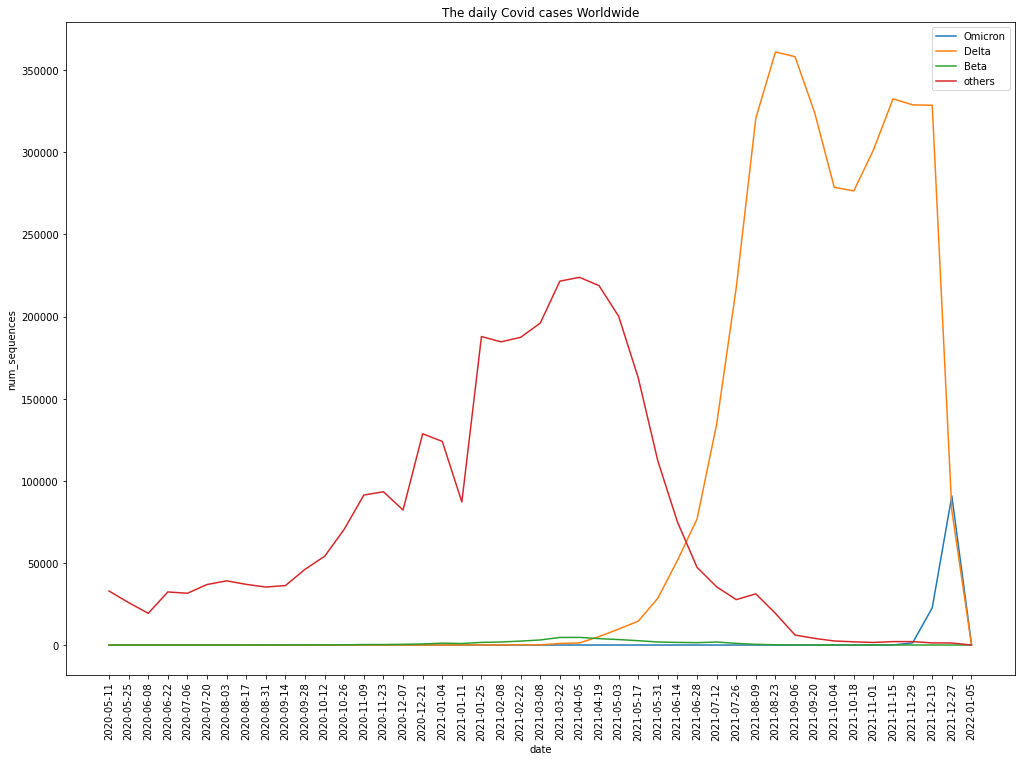

In [39]:
plt.figure(figsize = (17,12))
sns.lineplot(x=Omicron_data["date"],y=Omicron_data["num_sequences"],label="Omicron")
sns.lineplot(x=Delta_data['date'],y=Delta_data['num_sequences'],label='Delta')
sns.lineplot(x=Beta_data["date"],y=Beta_data['num_sequences'],label='Beta')
sns.lineplot(x=others_data['date'],y=others_data['num_sequences'],label='others')
plt.xticks(rotation=90)
plt.title('The daily Covid cases Worldwide')
plt.show()

In [40]:
Omicron.head(10)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
19,Angola,2020-07-06,Omicron,0,0.0,3
43,Angola,2020-08-31,Omicron,0,0.0,1
67,Angola,2020-09-28,Omicron,0,0.0,10
91,Angola,2020-10-12,Omicron,0,0.0,29
115,Angola,2020-10-26,Omicron,0,0.0,7
139,Angola,2020-12-07,Omicron,0,0.0,6
163,Angola,2020-12-21,Omicron,0,0.0,93
187,Angola,2021-01-04,Omicron,0,0.0,5
211,Angola,2021-01-11,Omicron,0,0.0,16
235,Angola,2021-01-25,Omicron,0,0.0,52


In [41]:
Omicron_aus = Omicron[Omicron['location']=='Australia']
np.size(Omicron_aus['date'])

44

In [44]:
Delta_aus = Delta[Delta['location'] == "Australia"]
Beta_aus = Beta[Beta['location']== "Australia"]
others_aus = others[others['location'] == 'Australia']

others_aus_data = others_aus.groupby("date").sum()

In [45]:
others_aus_data["date"] = others_aus_data.index
others_aus_data.head(10)

,num_sequences,perc_sequences,num_sequences_total,date
date,,,,
2020-05-11,296,200.0,3108,2020-05-11
2020-05-25,206,200.0,2163,2020-05-25
2020-06-08,188,200.0,1974,2020-06-08
2020-06-22,344,200.0,3612,2020-06-22
2020-07-06,1628,200.0,17094,2020-07-06
2020-07-20,5466,200.0,57393,2020-07-20
2020-08-03,8366,200.0,87843,2020-08-03
2020-08-17,6040,200.0,63420,2020-08-17
2020-08-31,3974,200.0,41727,2020-08-31


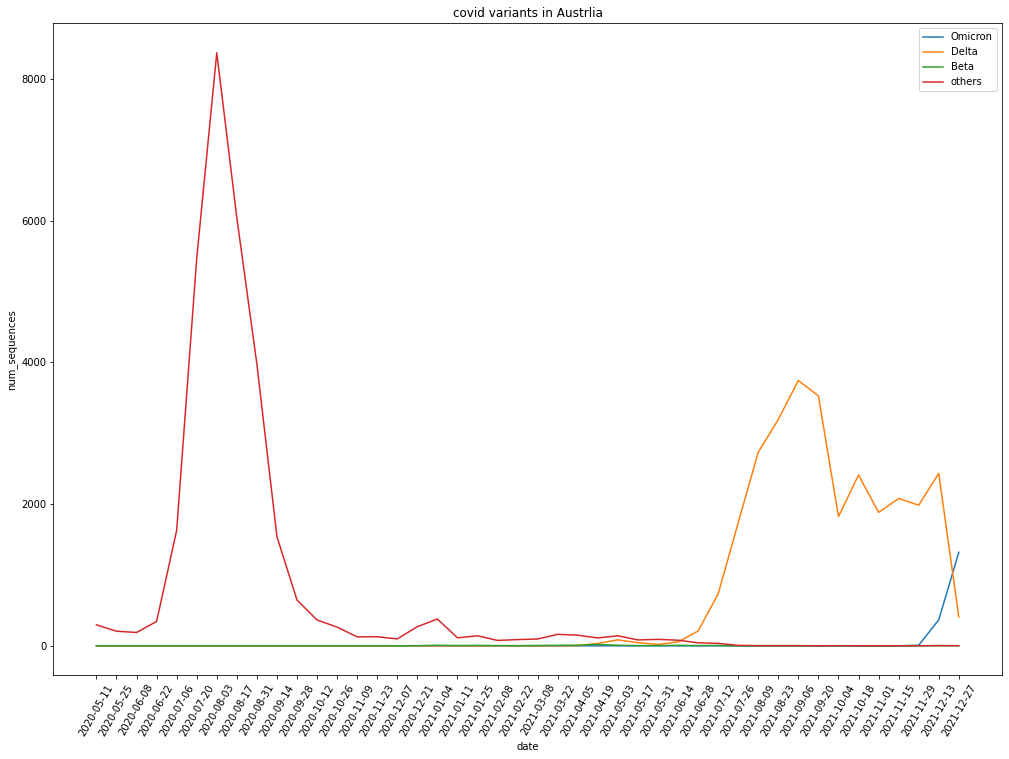

In [46]:
plt.figure(figsize=(17,12))
sns.lineplot(x=Omicron_aus["date"],y=Omicron_aus["num_sequences"],label="Omicron")
sns.lineplot(x=Delta_aus["date"],y=Delta_aus["num_sequences"],label="Delta")
sns.lineplot(x=Beta_aus["date"],y=Beta_aus["num_sequences"],label="Beta")
sns.lineplot(x=others_aus_data["date"],y=others_aus_data["num_sequences"],label="others")
plt.title('Covid variants in Austrlia')
plt.xticks(rotation=60)
plt.show()

## Omicron Austrlis v/s World

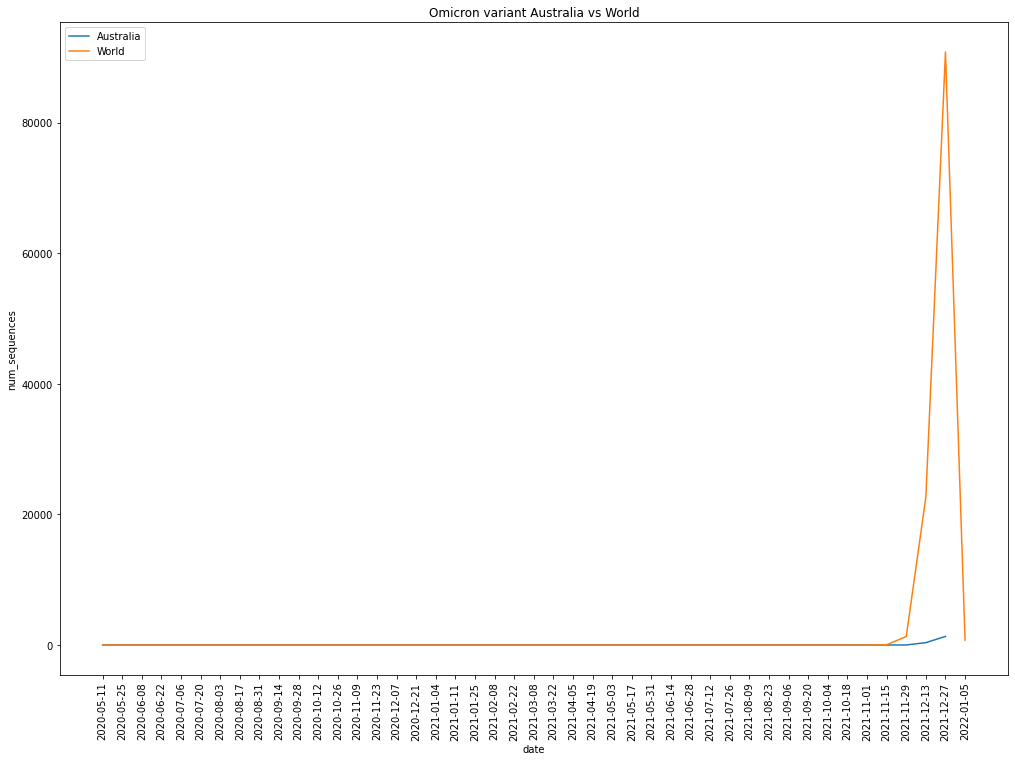

In [47]:
plt.figure(figsize=(17,12))
sns.lineplot(x=Omicron_aus["date"],y=Omicron_aus["num_sequences"],label="Australia")
sns.lineplot(x=Omicron_data["date"],y=Omicron_data["num_sequences"],label="World")
plt.title('Omicron variant Australia vs World')
plt.xticks(rotation=90)
plt.show()

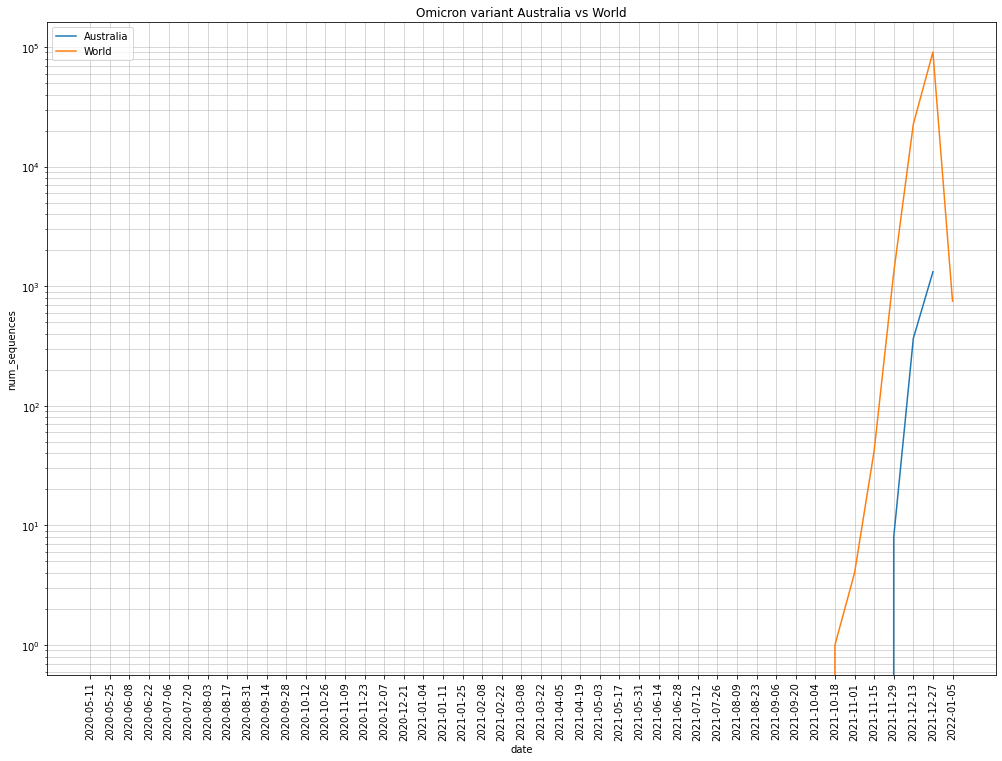

In [48]:
plt.figure(figsize=(17,12))
bx=sns.lineplot(x=Omicron_aus["date"],y=Omicron_aus["num_sequences"],label="Australia")
ax = sns.lineplot(x=Omicron_data["date"],y=Omicron_data["num_sequences"],label="World")
plt.title('Omicron variant Australia vs World')
plt.xticks(rotation=90)
ax.set(yscale = "log")
bx.set(yscale = "log")
plt.grid(which='major',linewidth = 0.5)
plt.grid(which='minor',linewidth = 0.5)
plt.show()

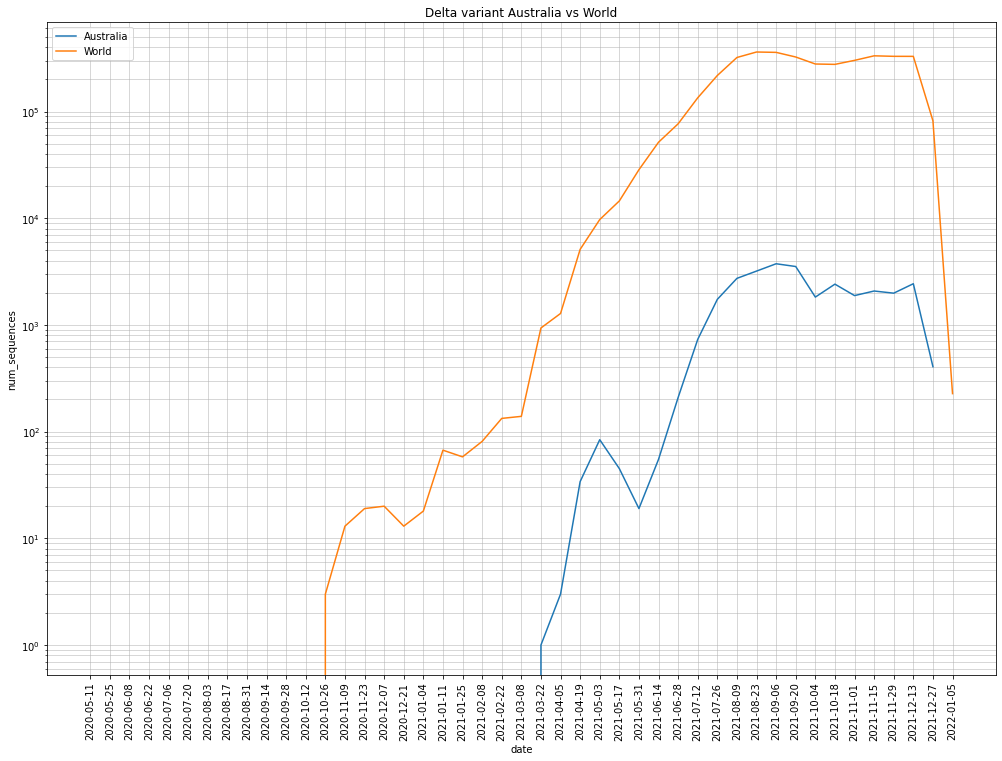

In [49]:
plt.figure(figsize=(17,12))
bx=sns.lineplot(x=Delta_aus["date"],y=Delta_aus["num_sequences"],label="Australia")
ax = sns.lineplot(x=Delta_data["date"],y=Delta_data["num_sequences"],label="World")
plt.title('Delta variant Australia vs World')
plt.xticks(rotation=90)
ax.set(yscale = "log")
bx.set(yscale = "log")
plt.grid(which='major',linewidth = 0.5)
plt.grid(which='minor',linewidth = 0.5)
plt.show()

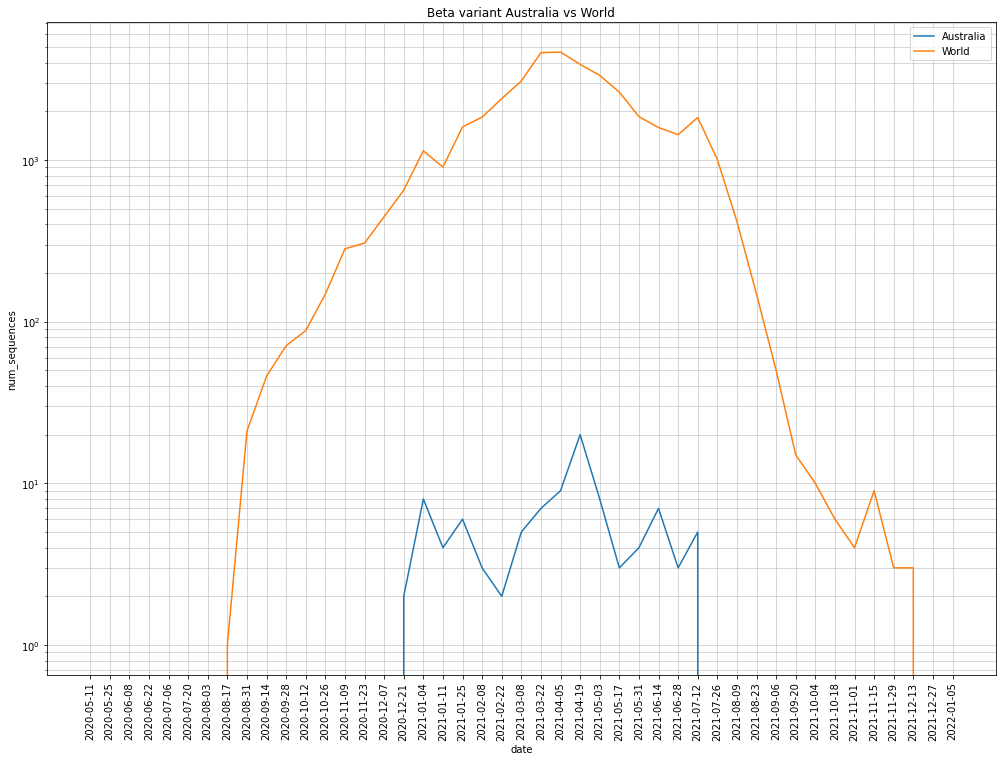

In [50]:
plt.figure(figsize=(17,12))
bx=sns.lineplot(x=Beta_aus["date"],y=Beta_aus["num_sequences"],label="Australia")
ax = sns.lineplot(x=Beta_data["date"],y=Beta_data["num_sequences"],label="World")
plt.title('Beta variant Australia vs World')
plt.xticks(rotation=90)
ax.set(yscale = "log")
bx.set(yscale = "log")
plt.grid(which='major',linewidth = 0.5)
plt.grid(which='minor',linewidth = 0.5)
plt.show()

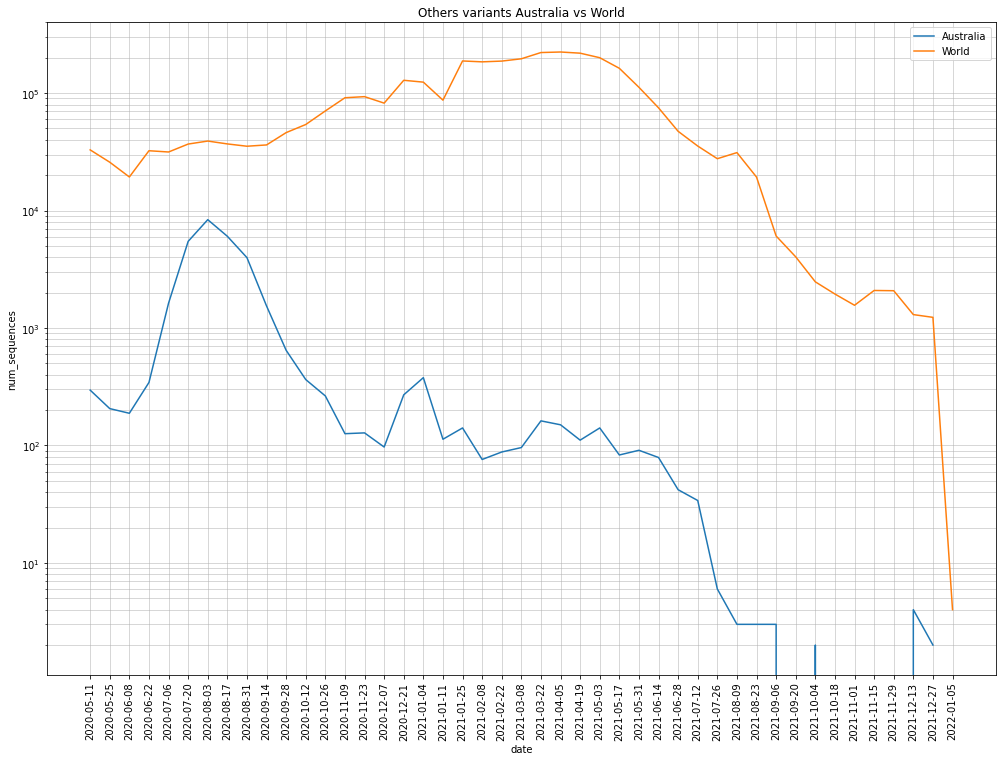

In [51]:
plt.figure(figsize=(17,12))
bx=sns.lineplot(x=others_aus_data["date"],y=others_aus_data["num_sequences"],label="Australia")
ax = sns.lineplot(x=others_data["date"],y=others_data["num_sequences"],label="World")
plt.title('Others variants Australia vs World')
plt.xticks(rotation=90)
ax.set(yscale = "log")
bx.set(yscale = "log")
plt.grid(which='major',linewidth = 0.5)
plt.grid(which='minor',linewidth = 0.5)
plt.show()